# Support Vector Machines (SVMs)

**Support Vector Machines** are supervised Machine Learning models that can be used for classification and regression tasks and also for <u>outliers detection</u>. They are particularly effective in dealing with complex and high-dimensional datasets.  
SVMs are based on the concept of finding an optimal hyperplane that separates different classes of data points in the feature space.

***
An **example usage** of **Support Vector Machines** <span style="font-size: 11pt; color: orange; font-weight:bold">using 3 different kernels</span> in binary classification problem with the help of popular library **Scikit Learn** is given in the *second* cell of this notebook.
***
## Intuition behind SVMs.

Suppose we have a dataset consisting of points that belong to two different classes, and we want to find a line that separates these classes as best as possible. In two dimensions, this line is a simple straight line, while in higher dimensions it becomes a hyperplane.  

The <u>SVM's goal is to find the optimal hyperplane that maximizes the margin between the two classes</u>, i.e., the distance (or "<span style="font-size: 11pt; color: orange; font-weight:bold">Street</span>") between the hyperplane and the nearest data points from each class. These data points are called **Support Vectors**.

## Support Vector Machines in classification task:

1. **Data Preparation:** First, you need a labeled dataset with examples of different classes. Each example should be represented by a set of features or attributes.

2. **Feature Space:** SVMs transform the original input space into a <u>higher-dimensional feature space</u>. This is done using a technique called the **Kernel Trick**, which allows SVMs to implicitly operate in a higher-dimensional space *without actually computing the transformation explicitly*. Commonly used kernel functions include **linear**, **polynomial**, **radial basis function (RBF)**, and **sigmoid**.

3. **Hyperplane Selection:** In the transformed feature space, SVMs aim to find the optimal hyperplane that separates the data points of different classes. <span style="font-size: 11pt; color: green; font-weight:bold">The optimal hyperplane is the one that maximizes the margin between the support vectors of the classes</span>.

4. **Margin and Support Vectors:** The margin is the distance between the hyperplane and the closest data points from each class. SVMs aim to maximize this margin to achieve better generalization. The data points that lie on the margin or within it are called **support vectors**. They are crucial because they <u>directly affect</u> the position and orientation of the hyperplane.

5. **Classification:** <u>Once the optimal hyperplane is determined</u>, SVMs can classify new, unseen data points by simply checking on which side of the hyperplane they fall.

6. **Handling Nonlinear Data:** SVMs can handle nonlinear data <u>by mapping it to a higher-dimensional space using the kernel trick</u>. This allows SVMs to find nonlinear decision boundaries in the original feature space.

7. **Hyperparameter Tuning:** SVMs have hyperparameters that need to be tuned to achieve optimal performance. Some common hyperparameters include:
    - the type of kernel 
    - the regularization parameter ($C$)
    - and the kernel-specific parameters (e.g., $\gamma$ in the RBF kernel).

By finding the optimal hyperplane and maximizing the margin, SVMs aim to create a decision boundary that is <span style="font-size: 11pt; color: green; font-weight:bold">less sensitive to noisy data</span> and <span style="font-size: 11pt; color: green; font-weight:bold">generalizes well</span> to new, unseen examples. 

SVMs can handle datasets with outliers effectively because they focus on the support vectors that have the most influence on the decision boundary.

Also Support Vector Machines have been extended to handle multiclass classification problems using various techniques such as one-vs-one or one-vs-rest approaches.

# Support Vector Machines Formulas:

1. **The decision function for SVM**:

$$
f(\mathbf{x}) = \text{sign}\left(\mathbf{w}^T\mathbf{x} + b\right)
$$

2. **The linear SVM objective function (soft-margin formulation)**:

$$
\min_{\mathbf{w}, b, \mathbf{\xi}} \frac{1}{2}\|\mathbf{w}\|^2 + C\sum_{i=1}^{n}\xi_i
$$

subject to:
$$
y_i(\mathbf{w}^T\mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0 \quad \forall i = 1, \ldots, n
$$

where:
- $\mathbf{x}$ is the input vector
- $\mathbf{w}$ is the weight vector
- $b$ is the bias term
- $C$ is the regularization parameter controlling the trade-off between margin maximization and training error minimization
- $y_i$ is the target output for the \(i\)-th training example
- $\xi_i$ is the slack variable representing the distance between a misclassified example and the margin

3. **The non-linear SVM objective function using the kernel trick**:

$$
\min_{\mathbf{\alpha}} \frac{1}{2} \sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) - \sum_{i=1}^{n} \alpha_i
$$

subject to:
$$
\sum_{i=1}^{n} \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C \quad \forall i = 1, \ldots, n
$$

where:
- $\mathbf{\alpha}$ is the vector of Lagrange multipliers
- $K(\mathbf{x}_i, \mathbf{x}_j)$ is the kernel function representing the similarity between $\mathbf{x}_i$ and $\mathbf{x}_j$

4. **Decision function using the kernel trick**:

$$
f(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^{n}\alpha_i y_i K(\mathbf{x}, \mathbf{x}_i) + b\right)
$$

where:
- $\mathbf{x}$ is the input vector to be classified
- $\alpha_i$ is the Lagrange multiplier for the \(i\)-th training example
- $y_i$ is the target output for the \(i\)-th training example
- $K(\mathbf{x}, \mathbf{x}_i)$ is the kernel function representing the similarity between \(\mathbf{x}\) and the \(i\)-th training example $\mathbf{x}_i$
- $b$ is the bias term


<span style="font-size: 11pt; color: orange; font-weight:bold">These formulas capture the essence of SVMs, both in their linear and non-linear forms.</span>

# Support Vector Machines with SciKit Learn

Below is the example usage of Support Vector Machines in classification task using different kernels:

- linear
- polynomial 
- radial basis function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

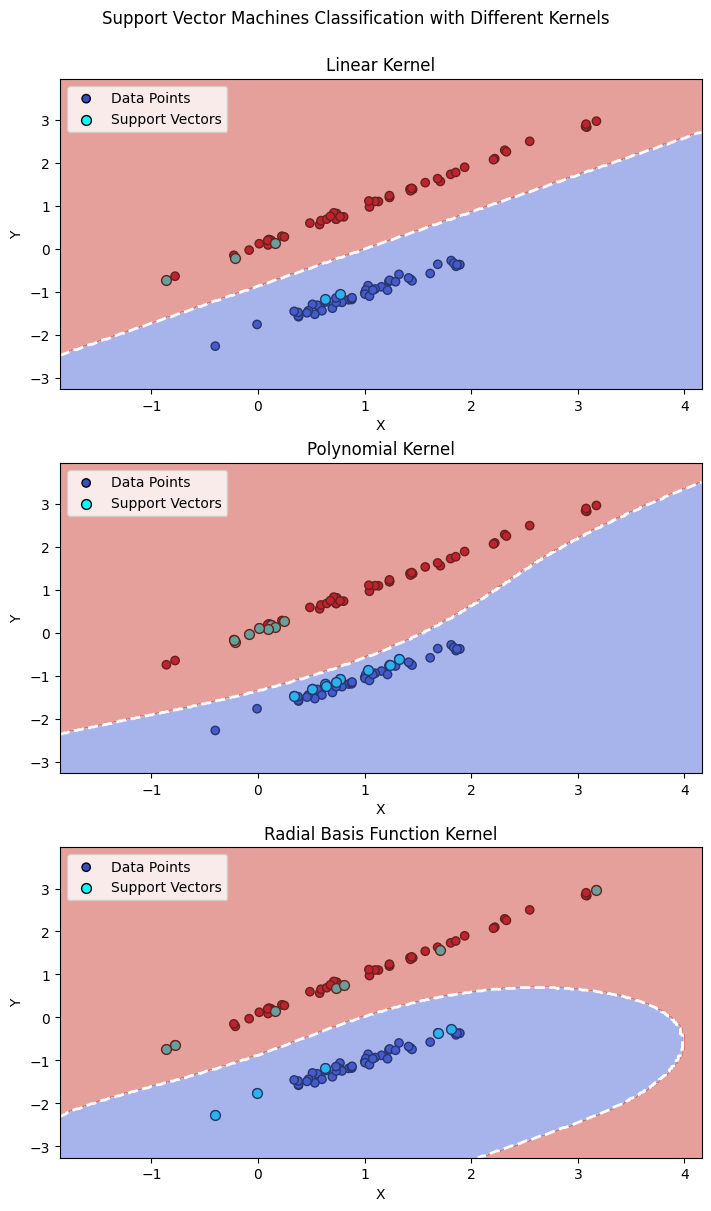

In [2]:
# Generate a binary dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

kernels = {
    'linear': 'Linear Kernel',
    'poly': 'Polynomial Kernel',
    'rbf': 'Radial Basis Function Kernel'
}

fig, axes = plt.subplots(len(kernels), 1, figsize=(7, 4 * len(kernels)), constrained_layout=True)

for i, (kernel, title) in enumerate(kernels.items()):
    # Create an instance of the SVC classifier
    svm = SVC(kernel=kernel)

    # Fit the SVM classifier to the data
    svm.fit(X, y)

    # Get support vectors and their indices
    support_vectors = svm.support_vectors_
    support_vectors_indices = svm.support_

    # Plot the data points and support vectors
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', label='Data Points')
    ax.scatter(
        support_vectors[:, 0], support_vectors[:, 1], c='cyan',
        marker='o', edgecolors='k', linewidths=1, s=50, label='Support Vectors'
    )

    # Create a meshgrid of points to visualize decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
    ax.contour(xx, yy, Z, colors='white', levels=[-1, 0, 1], linestyles=['--'], linewidths=[1, 2, 1])

    # Customize the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    ax.legend()

plt.suptitle('Support Vector Machines Classification with Different Kernels\n')
plt.show()